In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
dataset_train = pd.read_csv('PPERF(TRAIN).csv')
training_set = dataset_train.iloc[:,1:2].values

In [12]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-09-25,0.4375,0.4375,0.4375,0.4375,1.455233e+10,0
1,2012-09-26,0.4375,0.4375,0.4375,0.4375,1.455233e+10,0
2,2012-09-27,0.4375,0.4375,0.4375,0.4375,1.455233e+10,0
3,2012-09-28,0.4375,0.4375,0.4375,0.4375,1.455233e+10,0
4,2012-10-01,0.4375,0.4375,0.4375,0.4375,1.455233e+10,0


In [13]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [14]:
X_train = []
y_train = []
for i in range(60, 1642):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [16]:
regressor = Sequential()

regressor.add(LSTM(units= 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0,2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0,2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0,2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0,2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)




Epoch 1/100
1582/1582 [==============================] - 29s 18ms/step - loss: 0.0158
Epoch 2/100
1582/1582 [==============================] - 12s 7ms/step - loss: 0.0060
Epoch 3/100
1582/1582 [==============================] - 10s 6ms/step - loss: 0.0048
Epoch 4/100
1582/1582 [==============================] - 10s 6ms/step - loss: 0.0039
Epoch 5/100
1582/1582 [==============================] - 12s 8ms/step - loss: 0.0032
Epoch 6/100
1582/1582 [==============================] - 11s 7ms/step - loss: 0.0025
Epoch 7/100
1582/1582 [==============================] - 12s 8ms/step - loss: 0.0025
Epoch 8/100
1582/1582 [==============================] - 12s 8ms/step - loss: 0.0024
Epoch 9/100
1582/1582 [==============================] - 10s 6ms/step - loss: 0.0022
Epoch 10/100
1582/1582 [==============================] - 13s 8ms/step - loss: 0.0023
Epoch 11/100
1582/1582 [==============================] - 11s 7ms/step - loss: 0.0024
Epoch 12/100
1582/1582 [==============================] - 11s 

1582/1582 [==============================] - 6s 4ms/step - loss: 8.9273e-04
Epoch 95/100
1582/1582 [==============================] - 5s 3ms/step - loss: 8.4449e-04
Epoch 96/100
1582/1582 [==============================] - 6s 4ms/step - loss: 8.5889e-04
Epoch 97/100
1582/1582 [==============================] - 6s 4ms/step - loss: 8.9230e-04
Epoch 98/100
1582/1582 [==============================] - 5s 3ms/step - loss: 8.4517e-04
Epoch 99/100
1582/1582 [==============================] - 5s 3ms/step - loss: 8.7185e-04
Epoch 100/100
1582/1582 [==============================] - 5s 3ms/step - loss: 8.6162e-04


In [18]:
dataset_test = pd.read_csv('PPERF(TEST).csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


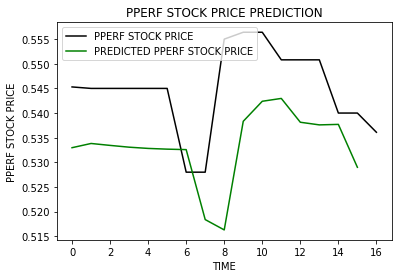

In [19]:
plt.plot(real_stock_price, color = 'black', label = 'PPERF STOCK PRICE')
plt.plot(predicted_stock_price, color = 'green', label = 'PREDICTED PPERF STOCK PRICE')
plt.title('PPERF STOCK PRICE PREDICTION')
plt.xlabel('TIME')
plt.ylabel('PPERF STOCK PRICE')
plt.legend()
plt.show()